# Análisis de señales unidimensionales

## Contenidos:

- Covarianza, correlación y convolución
- Transformada de Fourier discreta
- Transformada rápida de Fourier

### Notación

- Función de tiempo continuo: $g(t)$
- Función de tiempo discreto: $g[n] = g(t_n)$ con $t_n = n T_s, n\in [0, N]$
- Tiempo o intervalo de muestreo: $T_s$


<img src="../images/sampledsignal.png" width="600">


## Comparando señales: covarianza y correlación cruzada

Podemos analizar la similitud entre dos señales $g(\cdot)$ y $f(\cdot)$ en función de un retardo $\tau$ usando el la covarianza cruzada

$$ 
\text{COV}_{gf}(\tau) = \mathbb{E}[(g(t)-\mu_g)(f(t + \tau)-\mu_f)], 
$$

y para procesos discretos con retardo $m$:

$$ 

\text{COV}_{gf}[m] = \frac{1}{N} \sum_{n=1}^N (g[n] - \bar g)(f[n+m] - \bar f), $$

donde la media de la señal se estima como $ \bar g = \frac{1}{N} \sum_{n=1}^N g[n]$.

Si las señales tienen distinta escala es conveniente usar la correlación cruzada

$$ 
\rho_{gf}[m] = \frac{\text{COV}_{gf}[m]}{\hat \sigma_g \hat \sigma_f}, 
$$

donde la desviación estándar de la señal se estima como $\hat \sigma_g = \frac{1}{N} \sqrt{\sum_{n=1}^N (g[n] - \bar g)^2}$


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


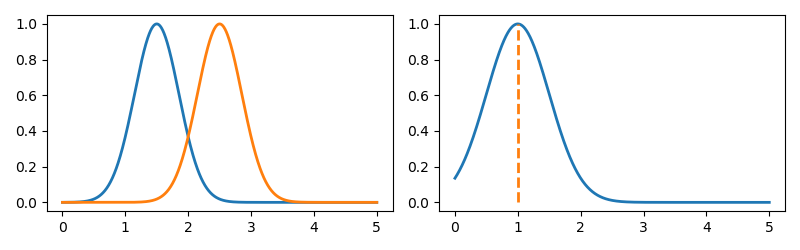

In [2]:
# Ejemplo: Correlación entre dos señales para encontrar su desface
x = np.linspace(0.0, 5.0, num=1000)
y1 = (np.exp(-4.0*(x-1.5)**2)); y2 = (np.exp(-4.0*(x-2.5)**2))
vary1 = np.mean(y1**2); vary2 = np.mean(y2**2);
crosscorr = np.zeros(shape=(1000,))
crosscorr[0] = np.sum(y1*y2)/1000
for m in range(len(crosscorr)-1):
    crosscorr[m+1] = np.sum(y1[:-m-1]*y2[m+1:])/1000

fig, ax = plt.subplots(1, 2, figsize=(8, 2.5), tight_layout=True)
ax[0].plot(x, y1, linewidth=2)
ax[0].plot(x, y2, linewidth=2)
ax[1].plot(x, crosscorr/np.sqrt(vary1*vary2), linewidth=2);
ax[1].plot([x[np.argmax(crosscorr)], x[np.argmax(crosscorr)]], 
           [0, 1], linewidth=2, linestyle='--');

### Autocorrelación

También es de interés comparar una señal consigo misma usando la autocorrelación 

$$ 
\rho_{gg}[m] = \frac{\text{COV}_{gg}[m]}{\hat \sigma_g^2}= \frac{1}{(N-m) \hat \sigma_g^2} \sum_{n=1}^{N-m} (g[n] - \bar g)(g[n+m] - \bar g), 
$$

Esto nos permite analizar en que momento $m$ la señal se parece más a si misma: **periodicidad**

<IPython.core.display.Javascript object>


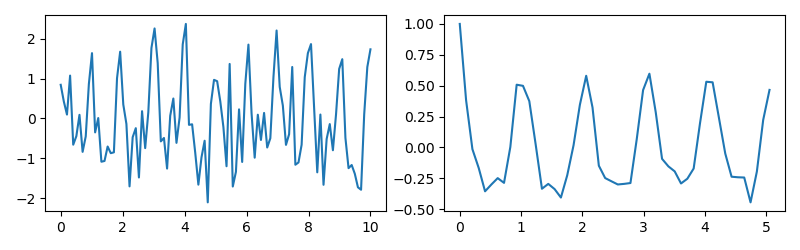

In [3]:
# Ejemplo: El periódo de la señal corresponde al segundo máximo de la autocorrelación
x = np.linspace(0.0, 10.0, num=100)
y = np.cos(2.0*np.pi*1*x) + 0.5*np.cos(2.0*np.pi*2*x) + 0.7*np.random.randn(len(x))
vary = np.mean(y**2)
autocorr = np.zeros(shape=(len(x)//2,))
autocorr[0] = np.mean(y**2)
for m in range(len(x)//2-1):
    autocorr[m+1] = np.mean(y[m+1:]*y[:-m-1])

fig, ax = plt.subplots(1, 2, figsize=(8, 2.5), tight_layout=True)
ax[0].plot(x, y)
ax[1].plot(np.linspace(0, x[len(x)//2], len(x)//2), autocorr/vary);

## Convolución

La operación de producto punto entre versiones desplazadas de funciones se llama **convolución** y se denota con $*$

$$
(f*g) (\tau) = \int g(t) f(\tau - t) \,dt = \int f(t) g(\tau - t) \,dt
$$


La convolución discreta se define como

$$
(f*g)[m] = \sum_n f[n] g[n-m]
$$

las funciónes de covarianza y correlación se pueden escribir como convoluciones

<IPython.core.display.Javascript object>


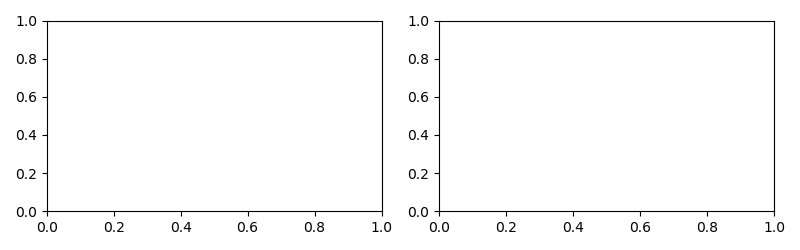

In [4]:
from matplotlib import animation
fig, ax = plt.subplots(1, 2, figsize=(8, 2.5), tight_layout=True)
t = np.arange(-4, 4, step=1e-2)

def square_pulse(t, a=0, T=1):
    s = np.zeros(shape=t.shape)
    s[np.absolute(t-a)<T] = 0.5 + 0.5*(t[np.absolute(t-a)<T]-a)/T 
    return s
lap_pulse = lambda t, a=0, s=1 : np.exp(-np.absolute(t-a)/s)
conv_s = np.convolve(square_pulse(t), lap_pulse(t), mode='same')

def update(a = 0): 
    ax[0].cla(); ax[1].cla()
    p1, p2 = square_pulse(t, 0.1*a - 4), lap_pulse(t)
    ax[0].plot(t, p2); ax[0].plot(t, p1); 
    ax[0].fill_between(t, 0, p1*p2, alpha=0.5)
    ax[1].plot(t, conv_s[::-1]); ax[1].scatter(0.1*a -4, np.sum(p1*p2), s=100, c='k')
    
anim = animation.FuncAnimation(fig, update, frames=80, interval=100, blit=True)

## Transformada de Fourier

Una herramienta de gran relevancia para el análisis de señales es la Transformada de Fourier

$$
\begin{align}
G(f) &= \mathcal{F}[g(t)] = \int_{-\infty}^{\infty} g(t) \exp(-j2\pi f t) \,dt \\
&= \int_{-\infty}^{\infty} g(t) \cos(2\pi f t) \,dt - j \int_{-\infty}^{\infty} g(t) \sin(2\pi f t) \,dt
\end{align}
$$

- Usamos el operador $\mathcal{F}$ para denotar la transformada
- Tipicamente se usa $G$ para la transformación de $g$
- $G$ es ahora una función de la frecuencia

> Usando la transformada de Fourier podemos analizar las frecuencias de oscilación predominantes de una señal

<IPython.core.display.Javascript object>


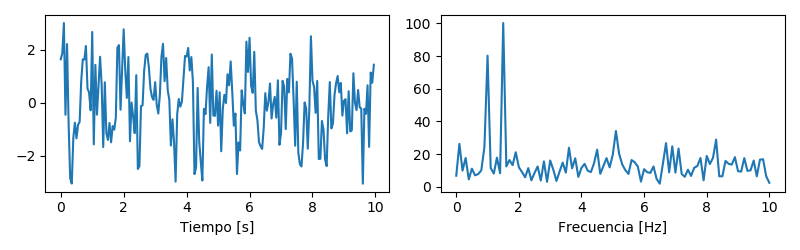

In [5]:
def matrix_DFT(signal):
    N = len(signal)
    W_N = np.exp(-1j*2*np.pi/N)
    n = np.arange(N)
    Omega = W_N**(n*n.reshape(1,-1).T)
    S = np.dot(Omega, signal)
    return np.dot(Omega, signal)

Fs = 20
t = np.arange(0.0, 10.0, step=1/Fs)
g = np.cos(2.0*np.pi*1*t) + np.cos(2.0*np.pi*1.5*t) + 1.0*np.random.randn(len(t))
f = np.linspace(0, Fs/2, num=len(t)//2+1)
Gabs = np.abs(matrix_DFT(g))

fig, ax = plt.subplots(1, 2, figsize=(8, 2.5), tight_layout=True)
ax[0].plot(t, g)
ax[0].set_xlabel("Tiempo [s]")
ax[1].plot(f, Gabs[:len(f)])
ax[1].set_xlabel("Frecuencia [Hz]");

## Propiedades y teoremas 


Es usual descomponer la transformada de Fourier en el espectro de amplitud y el espectro de fase

$$
G(f) = |G(f)| \exp({j\varphi(f)})
$$

Donde 
- $|G(f)|$ es el espectro de amplitud
-  $\varphi(f)$ es el espectro de fase (ángulo)

**Propiedad:** La transformada de Fourier es invertible

$$
\begin{align}
g(t) &= \mathcal{F}^{-1}[G(f)] =\int_{-\infty}^{\infty} G(f) \exp(j2\pi f t) \,df \\
&= \int_{-\infty}^{\infty} G(f) \cos(2\pi f t) \,df + j \int_{-\infty}^{\infty} G(f) \sin(2\pi f t) \,df
\end{align}
$$

**Propiedad:** La convolución en el tiempo se convierte en multiplicación en frecuencia y viceverza (Lathi & Ding, 2009, Sec 3.3.6)

$$
\mathcal{F}[g(t)*y(t)] = \mathcal{F}[g(t)] \mathcal{F}[y(t)] = G(f) Y(f)
$$

**Propiedad:** La transformada de Fourier es un operador lineal
$$
\begin{align}
\mathcal{F}[a g_1(t) + b g_2(t) ] &= a\mathcal{F}[g_1(t)] + b \mathcal{F}[g_2(t) ] \\ &= a G_1(f) + b G_2(f)
\end{align}
$$

**Teorema de Parseval/Teorema de energia de Rayleigh**: 

$$
\int_{-\infty}^{\infty} |g(t)|^2 \,dt = \int_{-\infty}^{\infty} |G(f)|^2 \,df
$$

> La energía de una señal se preserva. La transformada de Fourier no pierde información. (Lathi & Ding, 2009, Sec 3.7.1)

**Teorema de Wiener-Khinchin**:

$$
|G(f)|^2 = \int_{-\infty}^{\infty} \rho_{gg}(\tau) \exp({-j2\pi f \tau }) \,dt = \mathcal{F}[\rho_{gg}(\tau)]
$$
$$
\rho_{gg}(\tau) = \int_{-\infty}^{\infty} |G(f)|^2 \exp({j2\pi\tau f}) \,df  = \mathcal{F}^{-1}[|G(f)|^2]
$$

> La transformada de Fourier de la autocorrelación es la *densidad espectral de potencia* y viceverza (Lathi & Ding, 2009, 3.7.5)

 La densidad espectral es la potencia asignada a cada frecuencia de la señal


## Transformada de Fourier discreta (DFT)

Para computar la transformada de Fourier sobre señales muestreadas (discretas) usamos la DFT

El resultado es una transformada de Fourier definida en un conjunto discreto de frecuencias

Sea una señal discreta $g[n]$ con  $n \in [0, N-1]$ y tiempo de muestreo $T_s$, es decir $t[n] = n T_s$

La DFT se define como

$$
G[k] = \sum_{n=0}^{N-1} g[n]  \exp \left(-j2\pi f[k] t[n] \right) = \sum_{n=0}^{N-1} g[n] \exp \left( -j 2\pi \frac{k n}{N} \right) ,
$$

donde 
- $f[k] = k f_0 ~~ \forall k \in [-\frac{(N-1)}{2}, \frac{(N-1)}{2}]$
- $f_0 = \frac{F_s}{N}$
- $F_s = \frac{1}{T_s}$
- $t[n] = n T_s$

La DFT es también invertible

$$
g[n] = \frac{1}{N} \sum_{k=0}^{N-1} G[k]  \exp \left( j2\pi \frac{k n}{N} \right)
$$

Notar que N puntos en el tiempo se mapean con N frecuencias independientes

Para tener una notación más clara definiremos

$$
W_N = \exp \left( -j \frac{2\pi}{N} \right)
$$

Luego podemos escribrir la DFT como


$$
G[k] = \sum_{n=0}^{N-1} g[n] W_N^{kn}
$$

## Transformada de Fourier discreta (DFT)

Podemos escribir
$$
G[k] = \sum_{n=0}^{N-1} g[n] W_N^{kn}
$$
como 

$$
\begin{align}
\begin{pmatrix} 
G[0] \\
G[1] \\
G[2] \\
\vdots \\
G[N-1] \\
\end{pmatrix} &=
\begin{pmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & W_N & W_N^2 & \cdots & W_N^{N-1} \\
1 & W_N^2 & W_N^4 & \cdots & W_N^{N-2} \\
\vdots & \dots & \dots & \ddots &  \vdots \\
1 & W_N^{N-1} & W_N^{N-2} & \cdots & W_N \\
\end{pmatrix} 
\begin{pmatrix} 
g[0] \\
g[1] \\
g[2] \\
\vdots \\
g[N-1] \\
\end{pmatrix} \nonumber  \\
G &= \Omega g,
\end{align}
$$

que corresponde a $N$ tiempos definidos como 
$$
t = 0, ~ T_s, ~2 T_s , ~3 T_s, \ldots, ~(N-1) T_s 
$$
y a $N$ frecuencias definidas como
$$
f = -\frac{F_s}{2}, \ldots,  0, ~\frac{F_s}{N}, ~2 \frac{F_s}{N} , ~3 \frac{F_s}{N}, \ldots, ~\frac{F_s}{2} 
$$



En el ejemplo anterior implementamos la DFT como una multiplicación matricial usando Numpy

- Multiplicación entre una matriz de NxN y un vector de Nx1
- N sumas de N multiplicaciones, complejidad cuadrática

In [6]:
def matrix_DFT(signal):
    N = len(signal)
    W_N = np.exp(-1j*2*np.pi/N)
    n = np.arange(N)
    Omega = W_N**(n*n.reshape(1,-1).T)
    S = np.dot(Omega, signal)
    return np.dot(Omega, signal)

## Transformada rápida de Fourier

La computación de la DFT tiene complejidad $\mathcal{O}(N^2)$. Existe una aproximación numérica con complejidad $\mathcal{O}(N\log N)$: la Fast Fourier Transform (FFT). 

El algoritmo de Cooley-Tukey obtiene una FFT recursiva que explota las simentrías en la DFT.  

\begin{align}
G[k] &=  \sum_{n=0}^{N-1} g_n \exp \left(-j2\pi \frac{k n}{N} \right) \\
&= \sum_{n=0}^{N/2-1} g_{2n} \exp \left(-j2\pi \frac{k 2n}{N}  \right) + \sum_{n=0}^{N/2-1} g_{2n+1} \exp \left(-j2\pi \frac{k (2n+1)}{N} \right) \\
&= \sum_{n=0}^{N/2-1} g_{2n} \exp \left(-j2\pi \frac{k n}{N/2} \right) + \exp \left(-j2\pi  \frac{k}{N} \right) \sum_{k=0}^{N/2-1} g_{2n+1} \exp \left(-j2\pi \frac{k n}{N/2} \right) \\ 
&= G_E[k] + \exp \left( -j2\pi \frac{k}{N} \right) G_O[k] ~~ \forall k \in [0,N/2] 
\end{align} 

Notar que se calculan dos "medias" DFT

Para continuar usaremos la siguiente propiedad de la exponencial compleja

$$
 \exp \left(-j2\pi \frac{k+ N/2}{N}\right) = \exp \left(-j2\pi \frac{k}{N} \right) \exp \left(-j\pi\right) =  - \exp \left(-j2\pi \frac{k}{N} \right)
$$

Además por periodicidad/simetría de la DFT
$$
\begin{align}
G_E[k + N/2] &=  \sum_{n=0}^{N/2-1} g_{2n} \exp \left( -j2\pi \frac{(k+ N/2)n}{N/2} \right) \\
&= \sum_{n=0}^{N/2-1} g_{2n} \exp \left(-j2\pi \frac{k n}{N/2} \right)  \exp \left(-j2\pi n \right) = G_E[k]
\end{align}
$$
Finalmente
$$
\begin{align}
G[k] &=  G_E[k] + \exp \left( -j2\pi \frac{k}{N} \right) G_O[k] ~~~ \forall k \in [0,N/2] \\
G[k + N/2] &=  G_E[k + N/2] - \exp \left( -j2\pi \frac{k}{N} \right) G_O[k + N/2] \\
 &=  G_E[k] - \exp \left( -j2\pi \frac{k}{N} \right) G_O[k] \\
\end{align}
$$

##### En resumen

Para obtener $G[k]$ y $G[k + N/2]$:
- Calculamos $G_E[k]$ y $ \exp \left( -j2\pi \frac{k}{N} \right) G_O[k]$ 
- Sumamos o restamos los términos, respectivamente

> Reducimos los cálculos necesarios a la mitad


<IPython.core.display.Javascript object>


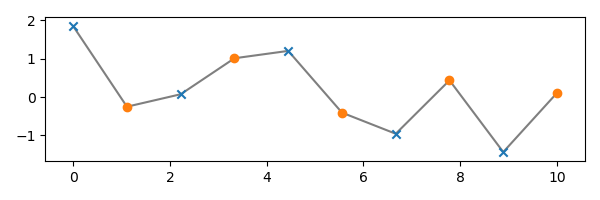

In [7]:
t = np.linspace(0, 10, num=10)
x = np.random.randn(len(t))
plt.figure(figsize=(6, 2), tight_layout=True)
plt.plot(t, x, c='k', alpha=0.5)
plt.scatter(t[::2], x[::2], marker='x', zorder=100)
plt.scatter(t[1::2], x[1::2], marker='o', zorder=100);

In [8]:
np.set_printoptions(precision=3)
N = len(x)
W_N = np.exp(-1j*2*np.pi/N)

S = matrix_DFT(x)
Se = matrix_DFT(x[0::2]) # Transformada de Fourier de los pares
So = matrix_DFT(x[1::2]) # Transformada de Fourier de los impares
display(S[:N//2])
display(Se + W_N**np.arange(N//2)*So)
display(np.allclose(S[:N//2], Se + W_N**np.arange(N//2)*So))
display(S[N//2:])
display(Se - W_N**np.arange(N//2)*So)
display(np.allclose(S[N//2:], Se - W_N**np.arange(N//2)*So))

array([1.626+0.j   , 1.07 -3.036j, 1.401+1.848j, 4.643-0.489j,
       1.385+2.365j])

array([1.626+0.j   , 1.07 -3.036j, 1.401+1.848j, 4.643-0.489j,
       1.385+2.365j])

True

array([-0.162-3.553e-16j,  1.385-2.365e+00j,  4.643+4.894e-01j,
        1.401-1.848e+00j,  1.07 +3.036e+00j])

array([-0.162+0.j   ,  1.385-2.365j,  4.643+0.489j,  1.401-1.848j,
        1.07 +3.036j])

True

Podemos continuar dividiendo y ahorrando computos hasta llegar a $N\log N$ productos
<img src="../images/FFT.gif" width="600">

#### Implementaciones de la FFT 

- Python: numpy.fft y [scipy.fftpack](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html#scipy.fftpack.fft)
- C: The Fastest Fourier Transform in the WEst (FFTW)

Nosotros usaremos:

<img src="../images/fftpack_scipy.png" width="600">

In [9]:
from scipy import fftpack as fft

### Tutorial rápido de fftpack

Para obtener la transformada de Fourier usando el modulo `fftpack` de scipy usamos 

- `fftpack.fft`: Calcula la transformada directa
- `fftpack.ifft`: Calcula la transformada inversa
- `fftpack.fftfreq`: Crea una arreglo de frecuencias (conveniente cuando se quiere graficar el espectro)
- `fftpack.fftshift` e `ifftshift`: Cambia el orden de los componentes del espectro de $[0,\ldots, F_s/2, -F_s/2, \ldots, -F_s/N]$ a $[-F_s/2, \ldots, 0, \ldots, F_s/2]$

**Comparación entre implementación matricial usando NumPy y FFT de scipy**

Primero creamos una serie de tiempo con frecuencia de muestreo $F_s$

<IPython.core.display.Javascript object>


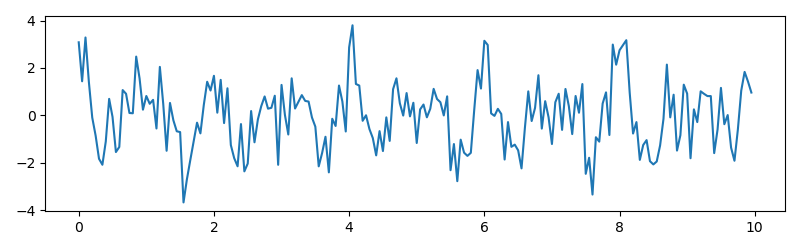

In [10]:
Fs = 20
t = np.arange(0.0, 10.0, step=1/Fs)
g = np.cos(2.0*np.pi*1*t) + np.cos(2.0*np.pi*1.5*t) + 1.0*np.random.randn(len(t))
fig, ax = plt.subplots(figsize=(8, 2.5), tight_layout=True)
ax.plot(t, g);

Para calcular la FFT usamos

In [11]:
G = fft.fft(g)
display(G[:10])

array([ -4.75  -0.j   ,   6.522 +4.088j,  16.025 +8.341j,  11.696-16.484j,
         8.788 -7.426j,   7.73  +0.653j,  -1.898+18.197j, -10.892 +8.327j,
        -8.299 +4.758j,   6.267 +4.631j])

La FFT es imaginaria, podemos recuperar 
- el espectro de magnitud usando la función `np.abs`
- el espectro de fase usando `np.angle`

Para generar el vector de frecuencias asociado a la FFT usamos

In [12]:
freq = fft.fftfreq(n=len(g), d=1/Fs)
display(freq[:10])

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Finalmente dibujamos los espectros de magnitud

<IPython.core.display.Javascript object>


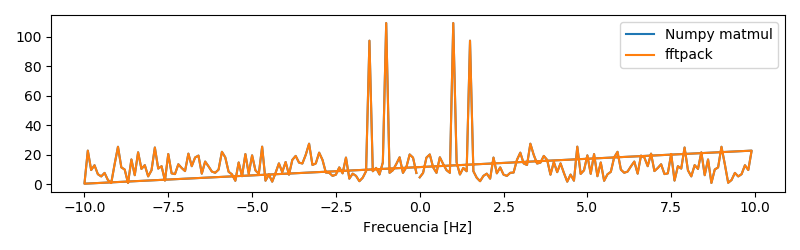

In [13]:
fig, ax = plt.subplots(figsize=(8, 2.5), tight_layout=True)
ax.plot(freq, np.abs(matrix_DFT(g)), label='Numpy matmul')
ax.plot(freq, np.abs(fft.fft(g)), label='fftpack')
ax.set_xlabel("Frecuencia [Hz]")
plt.legend(loc=1);

y comparamos los tiempos de cómputo

¿Cuántos órdenes de magnitud más rápido es la FFT?

In [14]:
%timeit -n 10 np.abs(matrix_DFT(g))
%timeit -n 10 np.abs(fft.fft(g))

20 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 36.96 times longer than the fastest. This could mean that an intermediate result is being cached.
138 µs ± 282 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
